In [2]:
import pystan
import matplotlib;

import arviz
import seaborn as sns
%pylab inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt;


from scipy.integrate import ode;
import scipy.signal;
from pylab import *;

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
asin=np.arcsin
sqrt=np.sqrt
sin=np.sin
cos=np.cos
pi=np.pi
exp=np.exp
tan=np.tan
I=1j
inf=np.inf
pi=np.pi
hilbert=scipy.signal.hilbert;
import pandas as pd;
import statsmodels.api as sm
import cartopy as ct
import stan_utility
from matplotlib.lines import Line2D

Populating the interactive namespace from numpy and matplotlib


/home/georgehagstrom/anaconda3/envs/stan/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg', 'random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}"


In [4]:
ProRepSlopes = pd.read_csv("ProReplication_IndianAtlantic_HalfSlope_Resort.csv")

In [5]:
ProRepSlopes["Hour"]=(fmod(ProRepSlopes["AdjustedHour"],24))

In [6]:
ProRepSlopes["DayV2"]=0
ProRepSlopes["NoonHour"] = mod(ProRepSlopes["AdjustedHour"]+12.0,24.0)
CurrentDay = 0
CurrentHour = 10.0
for i in range(len(ProRepSlopes)):
    NewHour = ProRepSlopes["NoonHour"].values[i]
    
    if NewHour<CurrentHour:
        CurrentDay = CurrentDay+1
    CurrentHour = NewHour
    ProRepSlopes.loc[i,"DayV2"]=CurrentDay

In [9]:
#maskHLI = where(isfinite(np.array(ProRepSlopes["HLIReplication"])))
maskHLII = where(isfinite(np.array(ProRepSlopes["HLIIReplication"])))



#timeVecHLI = np.array(ProRepSlopes["Hour"])[maskHLI]
timeVecHLII = np.array(ProRepSlopes["AdjustedHour"])[maskHLII]

#RepSlopeVecHLI = np.array(ProRepSlopes["HLIReplication"])[maskHLI]
RepSlopeVecHLII = np.array(ProRepSlopes["HLIIReplication"])[maskHLII]

#RepSlopeSDVecHLI = np.array(ProRepSlopes["HLIsd"])[maskHLI]
RepSlopeSDVecHLII = np.array(ProRepSlopes["HLIIsd"])[maskHLII]

#NObsHLI = len(timeVecHLI)
NObsHLII = len(timeVecHLII)

#AdjustedTimeVecHLI = np.array(ProRepSlopes["AdjustedHour"])[maskHLI]
AdjustedTimeVecHLII = np.array(ProRepSlopes["NoonHour"])[maskHLII]

#RealDayVecHLI = np.array(ProRepSlopes["Day"]).astype(int)[maskHLI]
RealDayVecHLII = np.array(ProRepSlopes["Noon-to-Noon"]).astype(int)[maskHLII]




#DayVecHLI = np.zeros(len(RealDayVecHLI)).astype(int)
DayVecHLII = np.zeros(len(RealDayVecHLII)).astype(int)


            

for i in range(len(RealDayVecHLII)):
    if i==0:
        DayVecHLII[i]=0
        currentDay = 0
    else:
        if RealDayVecHLII[i]==RealDayVecHLII[i-1]:
            DayVecHLII[i]=currentDay
        else:
            currentDay = currentDay+1
            DayVecHLII[i]=currentDay

#NDaysHLI = len(np.unique(DayVecHLI))
NDaysHLII = len(np.unique(DayVecHLII))

#CruiseVecHLI  = np.array(ProRepSlopes["Cruise"])[maskHLI]
CruiseVecHLII  = np.array(ProRepSlopes["Cruise"])[maskHLII]

SampleVecHLII = np.array(ProRepSlopes["Sample"])[maskHLII]
DayHLII = np.array(ProRepSlopes["Day"])[maskHLII]



ProGrowthModelDataFull = {"NObsHLII":NObsHLII,
                    "NDaysHLII":NDaysHLII,
                  "RepSlopeVecHLII":RepSlopeVecHLII,
                  "RepSlopeSDVecHLII":RepSlopeSDVecHLII,
                  "timeVecHLII":np.array(timeVecHLII),
                 "DayVecHLII":np.array(DayVecHLII).astype(int),
                  "AdjustedTimeVecHLII":np.array(AdjustedTimeVecHLII),
                  "DayHLII":DayHLII}

In [10]:
ProGrowthModelDataFull["CruiseVecHLII"]

KeyError: 'CruiseVecHLII'

In [11]:
Model = stan_utility.compile_model("ProReplicationSlopeFullHLIIOnlyV2.stan")

Using cached StanModel


In [12]:
ModelFit = Model.sampling(data=ProGrowthModelDataFull,chains=24,control={'adapt_delta':0.95,'max_treedepth':12})

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [13]:
SummaryFrame = ModelFit.to_dataframe()

In [14]:
ModelFit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_40919f811908c5a071f253da3609f772.
24 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=24000.

                    mean se_mean     sd    2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0                  0.06  2.1e-5 3.2e-3    0.05   0.05   0.06   0.06   0.06  22743    1.0
MeanRepMax          0.25  1.9e-4   0.03    0.19   0.23   0.25   0.27   0.32  29841    1.0
t1                  7.74  7.5e-4   0.11    7.53   7.67   7.74   7.81   7.95  20905    1.0
tw                  2.14  8.6e-4    0.1    1.95   2.08   2.15   2.21   2.34  13321    1.0
sigma               0.06  1.0e-5 1.7e-3    0.05   0.05   0.06   0.06   0.06  29437    1.0
MaxRepDayHLII[1]    0.25  1.5e-3    0.3   -0.34   0.05   0.25   0.45   0.83  40755    1.0
MaxRepDayHLII[2]    0.27  2.7e-4   0.05    0.16   0.23   0.27    0.3   0.37  41678    1.0
MaxRepDayHLII[3]    0.31  2.7e-4   0.06     0.2  

 Parameter | mean | sd | 2.5% | 25% | 50% | 75% | 97.5% | n_eff | Rhat
 --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
c0           |       0.06 | 2.1e-5 | 3.2e-3 |   0.05 |  0.05 |  0.06 |  0.06 |  0.06 | 23738 |   1.0
MeanRepMax   |       0.25 | 1.8e-4 |  0.03  |  0.19  | 0.23 |  0.25  | 0.27 |  0.32 | 33370  |  1.0
t1           |       7.74 | 7.6e-4 |  0.11  |  7.52 |  7.67  | 7.74  | 7.81 |  7.95 | 20746  |  1.0
tw           |       2.15 | 8.7e-4 |   0.1  |  1.95  |  2.08 |  2.15 |  2.21 |  2.34 | 13216 |   1.0
sigma        |       0.06 | 1.0e-5 | 1.7e-3 |   0.05 |  0.05 |  0.06 |  0.06 |  0.06 | 27900 |   1.0

In [15]:
data = arviz.from_pystan(
    posterior=ModelFit,
    posterior_predictive=['RepSlopePostHLII'],
    observed_data=['RepSlopeVecHLII'],
    constant_data=['NObsHLII','NDaysHLII','timeVecHLII','AdjustedTimeVecHLII','DayVecHLII'],
    coords={'timeHLII':timeVecHLII,'LocI':np.array(range(74)),'LocI':np.array(range(612))},
    dims={
        'RepSlopePostHLII': ['LocHLII'],
        'RepSlopeVecHLII':['LocHLII'],
    }
)
data



Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data
	> constant_data

/home/georgehagstrom/anaconda3/envs/stan/lib/python3.8/site-packages/arviz/utils.py:409: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_cov" failed type inference due to: Untyped global name '_dot': Cannot determine Numba type of <class 'arviz.utils.maybe_numba_fn'>

File "../../../anaconda3/envs/stan/lib/python3.8/site-packages/arviz/utils.py", line 421:
def _cov(data):
    <source elided>
        x -= avg[:, None]
        prod = _dot(x, x.T.conj())
        ^

  @conditional_jit(cache=True)
INFO:numba.core.transforms:finding looplift candidates
/home/georgehagstrom/anaconda3/envs/stan/lib/python3.8/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "_cov" was compiled in object mode without forceobj=True.

File "../../../anaconda3/envs/stan/lib/python3.8/site-packages/arviz/utils.py", line 410:
@conditional_jit(cache=True)
def _cov(data):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/georgehagstrom

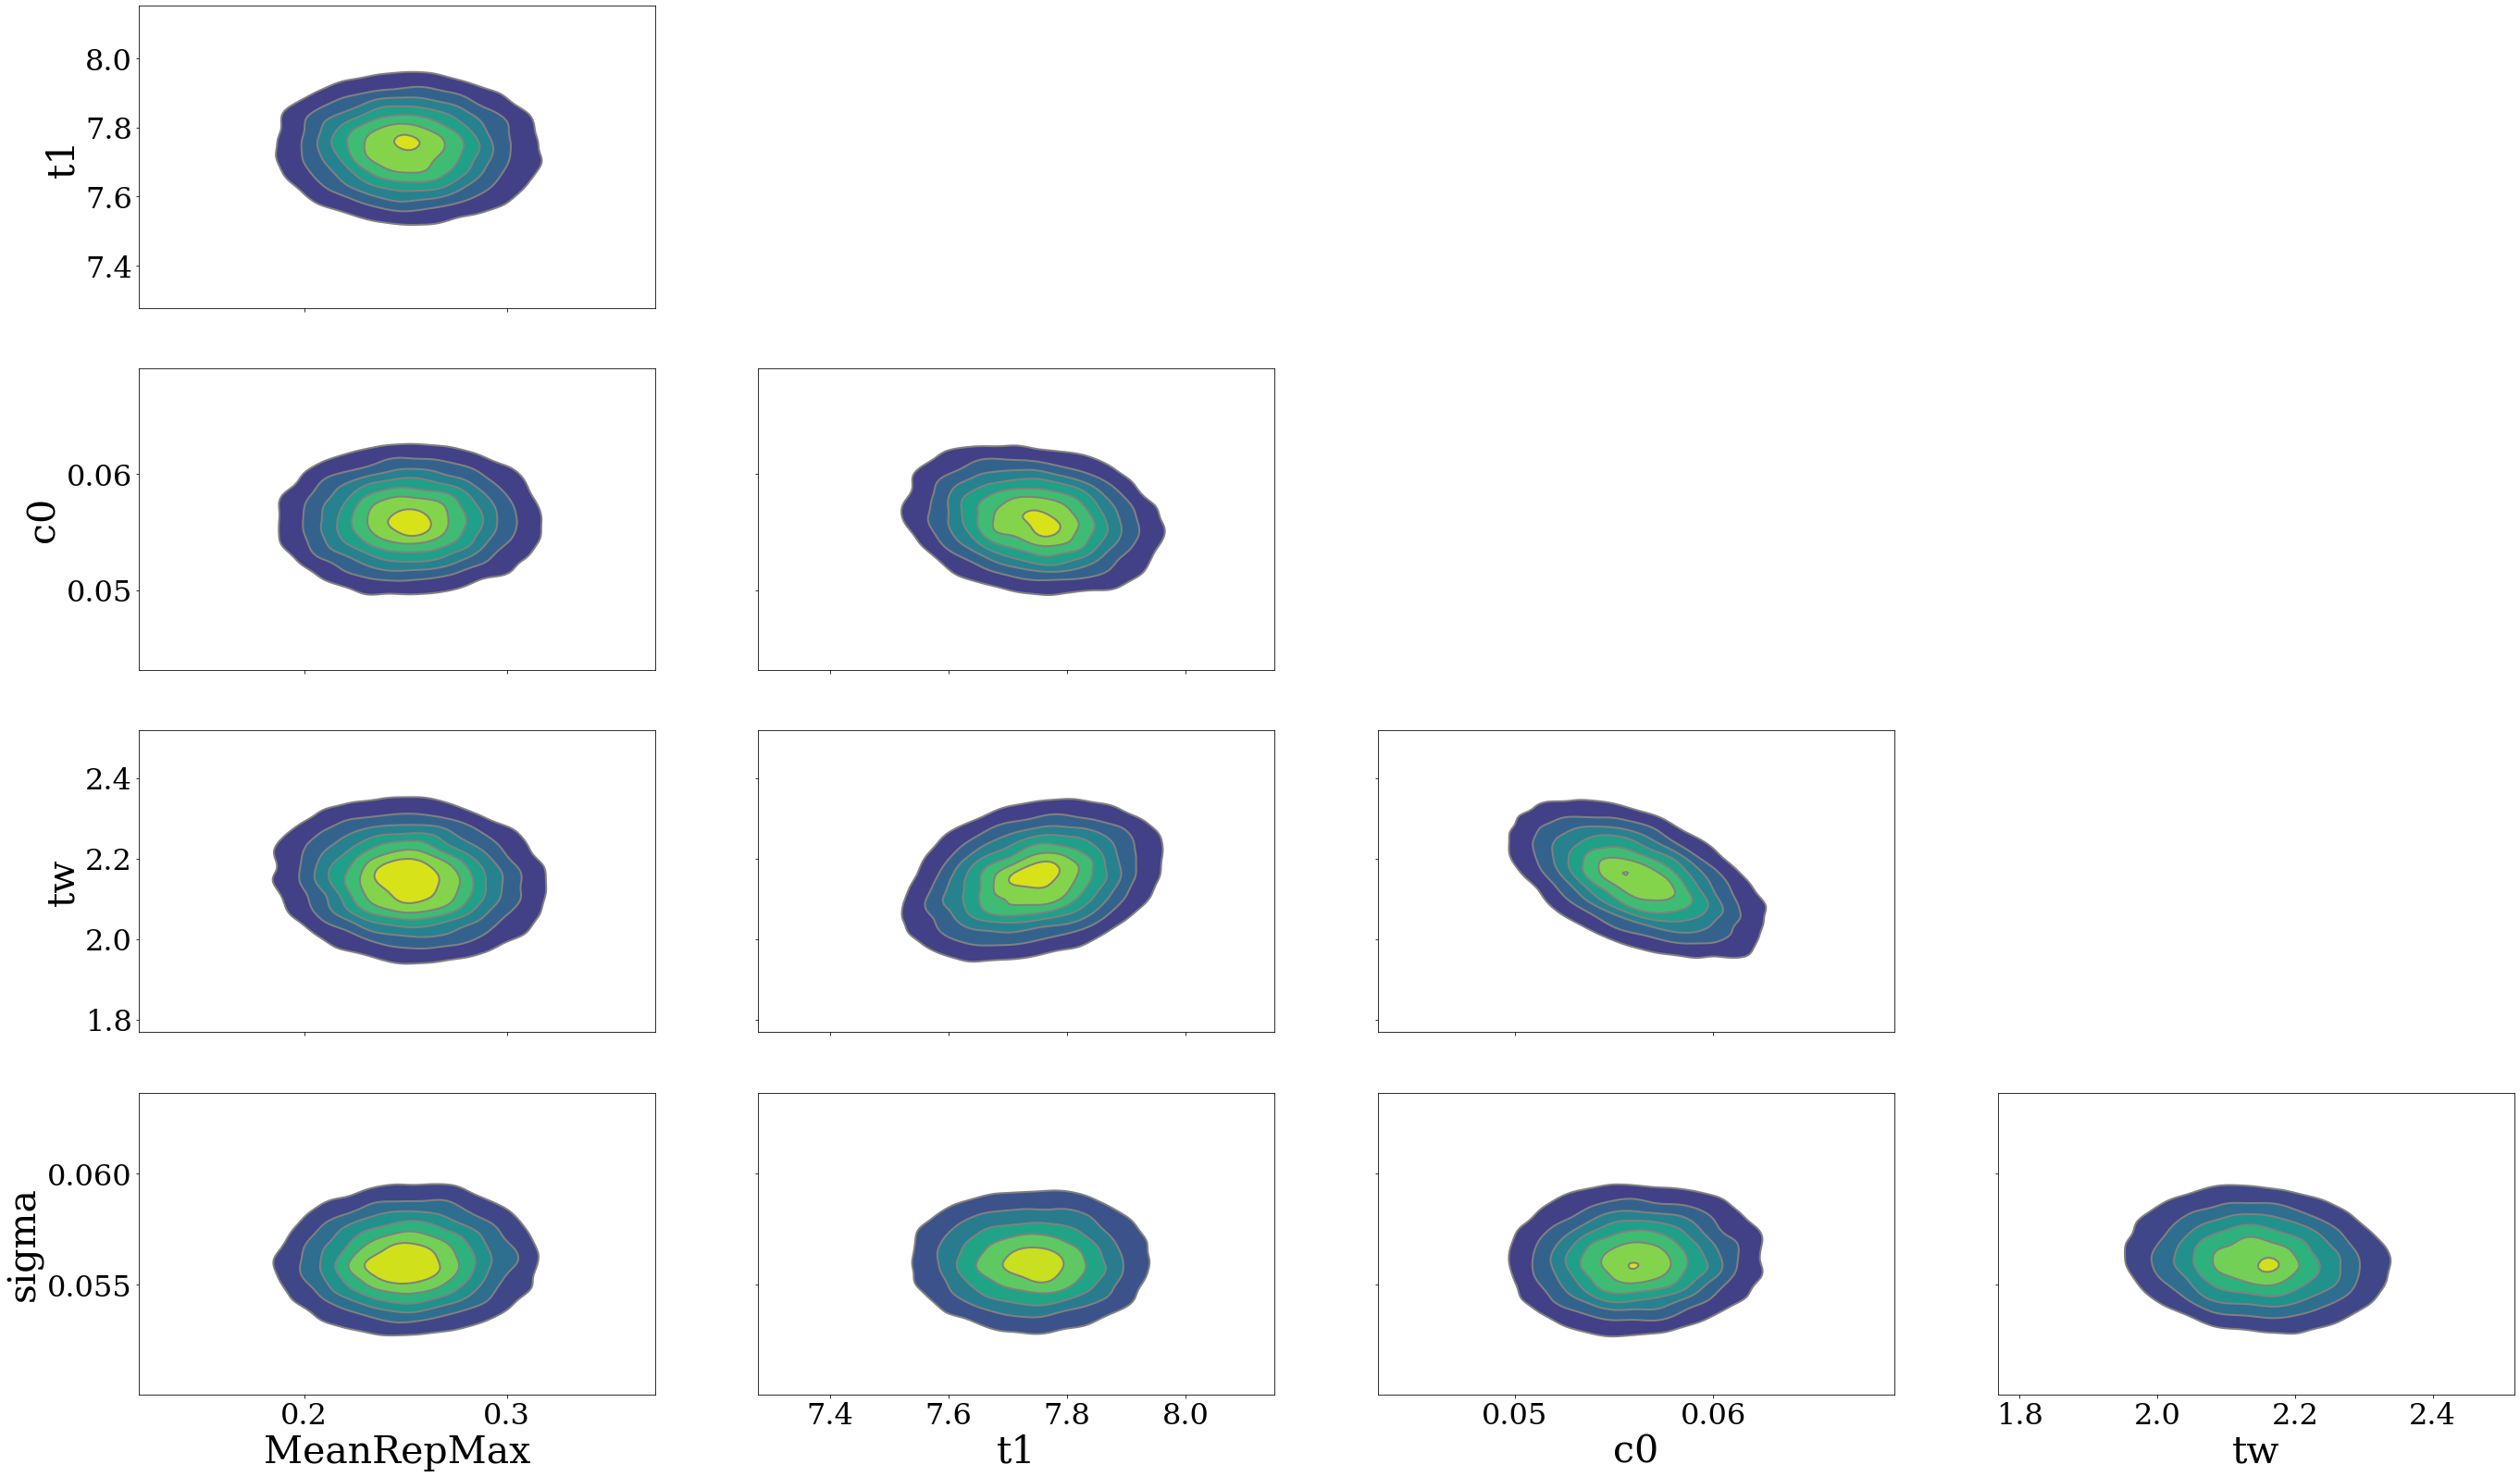

In [17]:
arviz.plot_pair(ModelFit,var_names=("MeanRepMax","t1","c0","tw","sigma"), kind='kde',textsize=32);


In [176]:
pystan.stan_rdump(ProGrowthModelDataFull,'ProGrowthModelDataFull.R')